## Importing Data

In [1]:
#loading csv file
import pandas as pd
df = pd.read_csv(r".\oasis_longitudinal_noNA.csv")
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3,27,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4,28,0.0,1689,0.712,1.039


In [2]:
#removing unwanted columns
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1)
df['M/F'] = df['M/F'].replace(['M','F'], [1,0])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])
df.head()

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2,27,0.0,1987,0.696,0.883
1,OAS2_0001,0,457,1,88,14,2,30,0.0,2004,0.681,0.876
2,OAS2_0004,0,0,0,88,18,3,28,0.0,1215,0.710,1.444
3,OAS2_0004,0,538,0,90,18,3,27,0.0,1200,0.718,1.462
4,OAS2_0005,0,0,1,80,12,4,28,0.0,1689,0.712,1.039


## Data Preprocessing

In [3]:
#checking missing values
pd.isnull(df).sum() 

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## Exploratory Data Analysis (EDA)
### (Which characteristics have most impact on Group)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
print(df.dtypes)

Subject ID     object
Group           int64
MR Delay        int64
M/F             int64
Age             int64
EDUC            int64
SES             int64
MMSE            int64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


,M/F,Group
M/F,1.000000,0.223649
Group,0.223649,1.000000


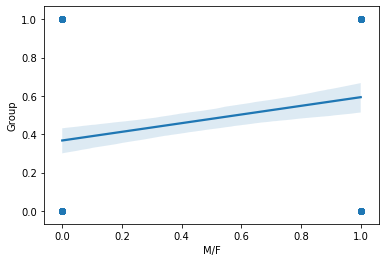

In [6]:
sns.regplot(x="M/F", y="Group", data=df)
df[["M/F","Group"]].corr()

,Age,Group
Age,1.000000,-0.003311
Group,-0.003311,1.000000


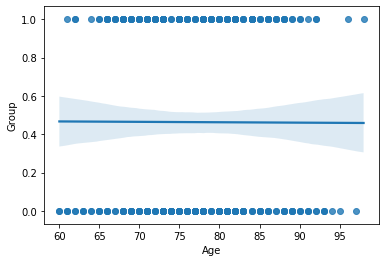

In [7]:
sns.regplot(x="Age", y="Group", data=df)
df[["Age","Group"]].corr()

,EDUC,Group
EDUC,1.000000,-0.163307
Group,-0.163307,1.000000


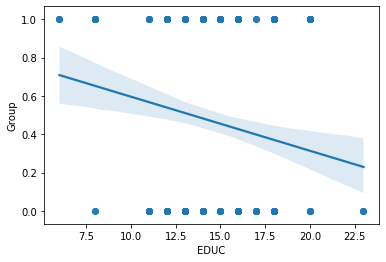

In [8]:
sns.regplot(x="EDUC", y="Group", data=df)
df[["EDUC","Group"]].corr()

,SES,Group
SES,1.000000,0.062463
Group,0.062463,1.000000


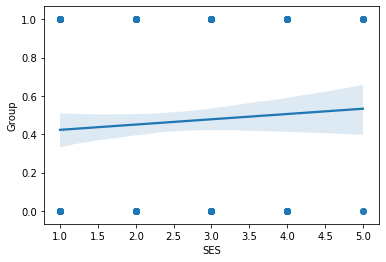

In [9]:
sns.regplot(x="SES", y="Group", data=df)
df[["SES","Group"]].corr()

,MMSE,Group
MMSE,1.000000,-0.527441
Group,-0.527441,1.000000


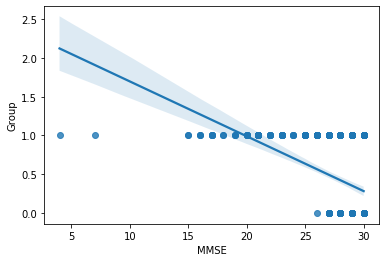

In [10]:
sns.regplot(x="MMSE", y="Group", data=df)
df[["MMSE","Group"]].corr()

,CDR,Group
CDR,1.00000,0.77356
Group,0.77356,1.00000


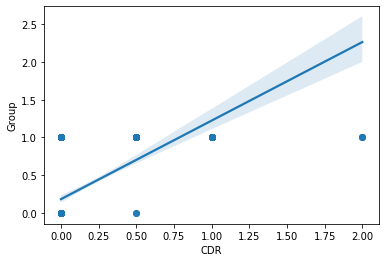

In [11]:
sns.regplot(x="CDR", y="Group", data=df)
df[["CDR","Group"]].corr()

,eTIV,Group
eTIV,1.00000,-0.03378
Group,-0.03378,1.00000


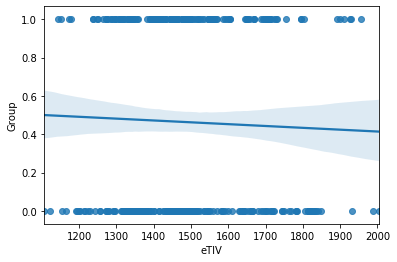

In [12]:
sns.regplot(x="eTIV", y="Group", data=df)
df[["eTIV","Group"]].corr()

,nWBV,Group
nWBV,1.000000,-0.313929
Group,-0.313929,1.000000


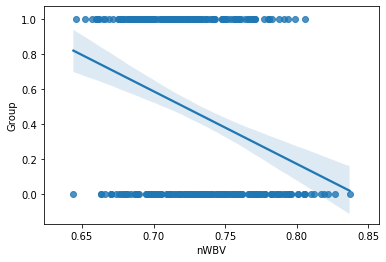

In [13]:
sns.regplot(x="nWBV", y="Group", data=df)
df[["nWBV","Group"]].corr()

,ASF,Group
ASF,1.000000,0.021401
Group,0.021401,1.000000


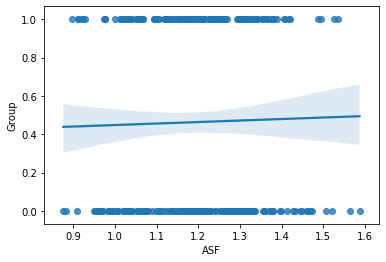

In [14]:
sns.regplot(x="ASF", y="Group", data=df)
df[["ASF","Group"]].corr()

In [15]:
#Descriptive statistics
df.describe()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.463277,601.353107,0.423729,77.033898,14.703390,2.460452,27.409605,0.271186,1489.991525,0.729879,1.193780
std,0.499355,640.596081,0.494848,7.811808,2.895662,1.134005,3.712626,0.370537,175.768462,0.037842,0.136821
min,0.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.250000,0.699000,1.100250
50%,0.000000,559.500000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.500000,0.729000,1.193500
75%,1.000000,882.500000,1.000000,82.000000,16.750000,3.000000,30.000000,0.500000,1595.250000,0.757000,1.292500
max,1.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## Pearson Correlation Coefficient and P-Value

In [16]:
from scipy import stats

In [17]:
pearson_coef, p_value = stats.pearsonr(df['M/F'], df['Group'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.22364909043757103  with a P-value of P = 2.1668487372550117e-05


In [18]:
pearson_coef, p_value = stats.pearsonr(df['Age'], df['Group'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.0033110387583612294  with a P-value of P = 0.9505017840405561


In [19]:
pearson_coef, p_value = stats.pearsonr(df['EDUC'], df['Group'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.1633067488647369  with a P-value of P = 0.0020530454564519516


In [20]:
pearson_coef, p_value = stats.pearsonr(df['SES'], df['Group'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.0624625428354591  with a P-value of P = 0.2411111066454381


In [21]:
pearson_coef, p_value = stats.pearsonr(df['MMSE'], df['Group'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.5274410029460808  with a P-value of P = 9.661929376491264e-27


In [22]:
pearson_coef, p_value = stats.pearsonr(df['CDR'], df['Group'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.7735596821520823  with a P-value of P = 1.0180522752319728e-71


In [23]:
pearson_coef, p_value = stats.pearsonr(df['eTIV'], df['Group'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.033779992653784875  with a P-value of P = 0.5264073748144905


In [24]:
pearson_coef, p_value = stats.pearsonr(df['nWBV'], df['Group'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.3139288349360294  with a P-value of P = 1.5508434656244608e-09


In [25]:
pearson_coef, p_value = stats.pearsonr(df['ASF'], df['Group'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.021400622899071818  with a P-value of P = 0.6882197477182757


## Splitting Dataset into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [27]:
Y = df['Group']
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF' ]]

#Splitting dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

number of test samples : 36
number of training samples: 318


## Model Developement and Evaluation

In [28]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

### Logistic Regression

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_train, Y_train, cv=kfolds, scoring='accuracy') # Get recall for each parameter setting
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_train_scaled, Y_train)

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)

Best accuracy on validation set is: 0.9435019841269842
Best parameter for regularization (C) is:  100
Test accuracy with best C parameter is 0.9444444444444444
Test recall with the best C parameter is 0.8823529411764706
Test AUC with the best C parameter is 0.9411764705882353


#### Confusion Matrix

In [31]:
logRegModel.fit(X_train, Y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_predict = logRegModel.predict(X_test)
y_pred_quant = logRegModel.predict_proba(X_test)[:, 1]
y_pred_bin = logRegModel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, y_predict, labels=[1,0]))

[[15  2]
 [ 0 19]]


Confusion matrix, without normalization
[[15  2]
 [ 0 19]]


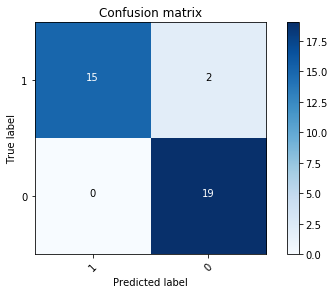

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [35]:
confusion_matrix = confusion_matrix(Y_test, y_predict)
confusion_matrix

array([[19,  0],
       [ 2, 15]], dtype=int64)

In [36]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9047619047619048
Specificity :  1.0


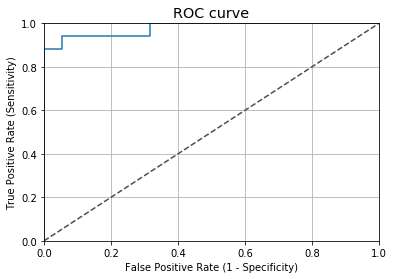

In [37]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [38]:
auc(fpr, tpr)

0.978328173374613

### Support Vector Machine

In [39]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_train_scaled, Y_train, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
            

# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_train_scaled, Y_train)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

Best accuracy on cross validation set is: 0.9623511904761906
Best parameter for c is:  10
Best parameter for gamma is:  10
Best parameter for kernel is:  rbf
Test accuracy with the best parameters is 0.9444444444444444
Test recall with the best parameters is 0.8823529411764706
Test recall with the best parameter is 0.9411764705882353


#### Confusion Matrix

In [40]:
svmModel = SVC(probability=True)
svmModel.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
y_predict = svmModel.predict(X_test)
y_pred_quant = svmModel.predict_proba(X_test)[:, 1]
y_pred_bin = svmModel.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, y_predict, labels=[1,0]))

[[ 0 17]
 [ 0 19]]


Confusion matrix, without normalization
[[ 0 17]
 [ 0 19]]


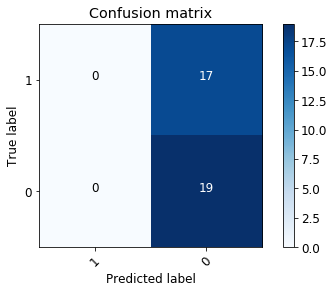

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [44]:
confusion_matrix = confusion_matrix(Y_test, y_pred_bin)
confusion_matrix

array([[19,  0],
       [17,  0]], dtype=int64)

In [45]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.5277777777777778
Specificity :  nan


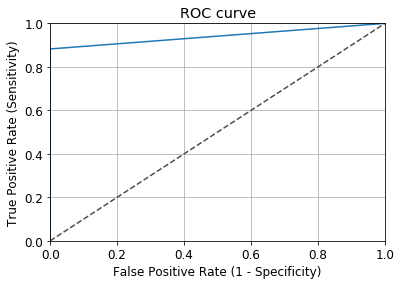

In [46]:
fpr_svm, tpr_svm, thresholds = roc_curve(Y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [47]:
auc(fpr_svm, tpr_svm)

0.8018575851393189

### Decision Tree

In [48]:
best_score = 0

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_train_scaled, Y_train, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

# Rebuild a model on the combined training and validation set        
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_train_scaled, Y_train)

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

Best accuracy on validation set is: 0.9435019841269842
Best parameter for the maximum depth is:  1
Test accuracy with best parameter is  0.9444444444444444
Test recall with best parameters is  0.8823529411764706
Test AUC with the best parameter is  0.9411764705882353


#### Confusion Matrix

In [49]:
treeModel.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [50]:
y_predict = treeModel.predict(X_test)
y_pred_quant =  treeModel.predict_proba(X_test)[:, 1]
y_pred_bin = treeModel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, y_predict, labels=[1,0]))

[[15  2]
 [ 1 18]]


Confusion matrix, without normalization
[[15  2]
 [ 1 18]]


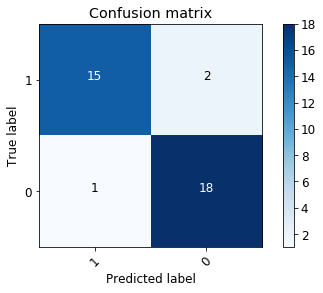

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [53]:
confusion_matrix = confusion_matrix(Y_test, y_predict)
confusion_matrix

array([[18,  1],
       [ 2, 15]], dtype=int64)

In [54]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9
Specificity :  0.9375


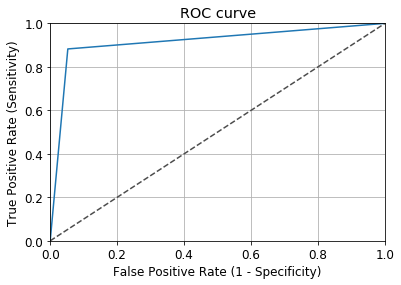

In [55]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [56]:
auc(fpr, tpr)

0.9148606811145512

#### Visualizing the Decision Tree

In [57]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

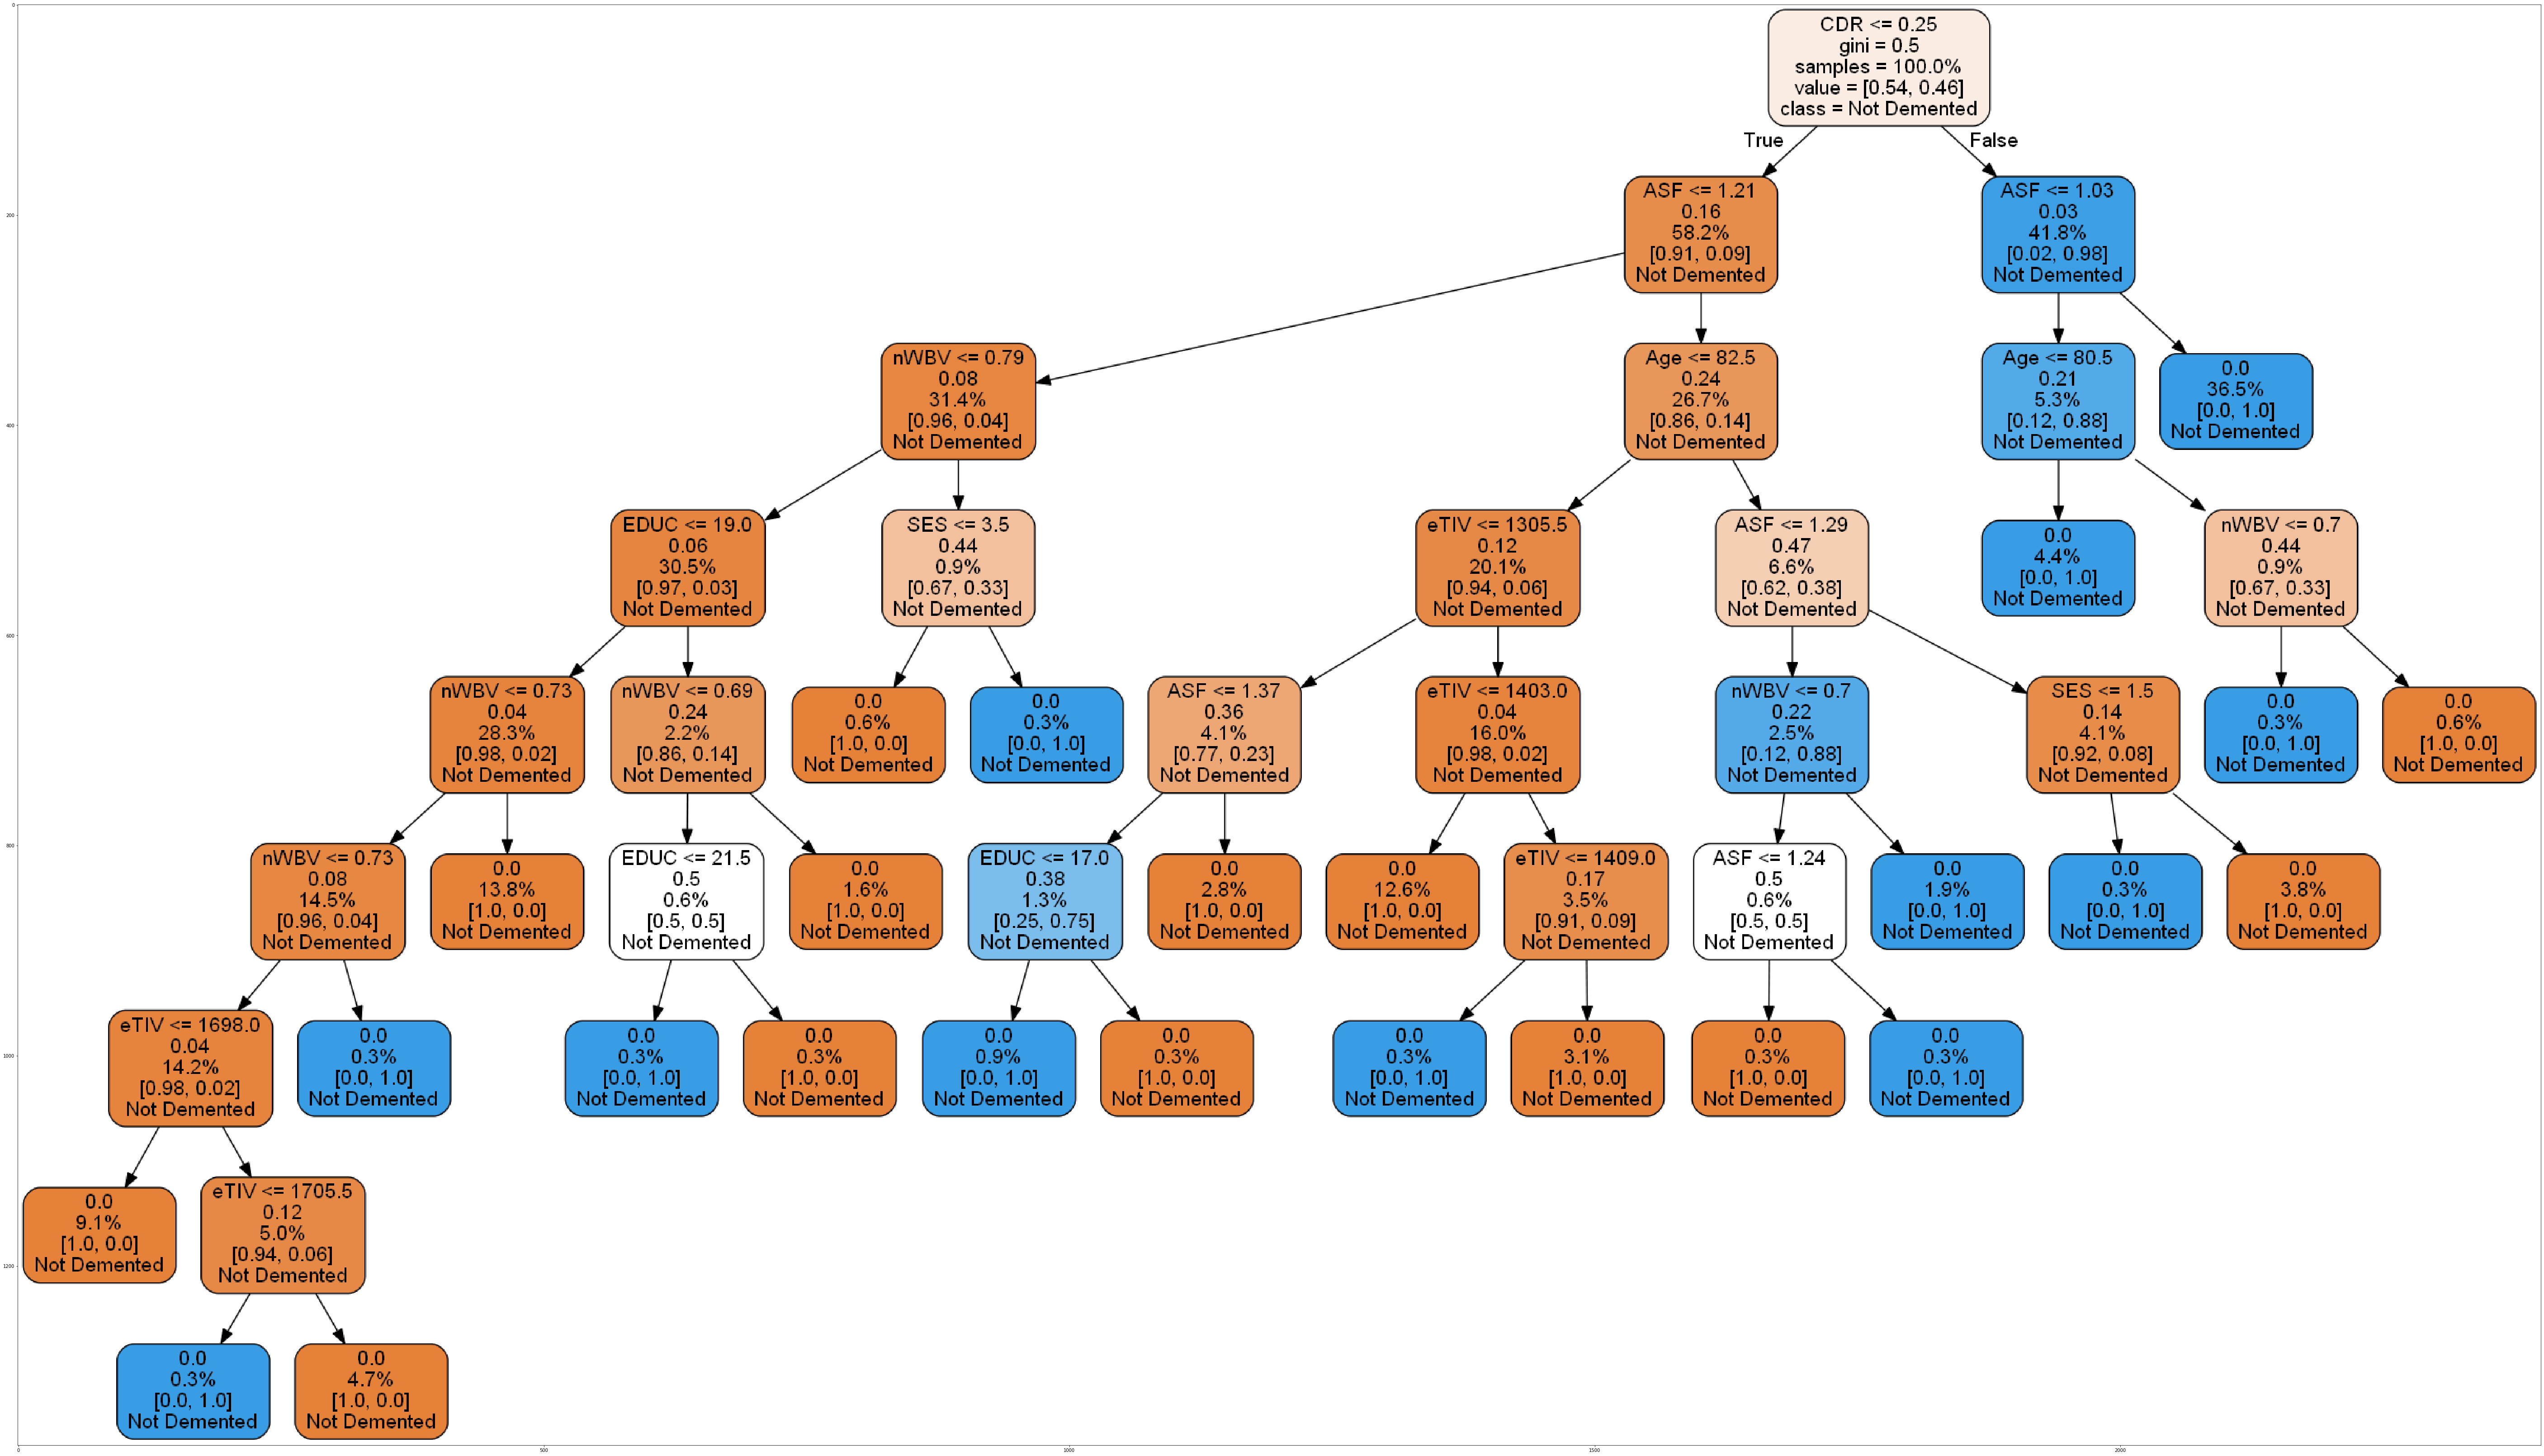

In [58]:
treeModel.fit(X_train,Y_train)
dot_data = StringIO()
feature_names = [i for i in X_train.columns]

y_train_str = Y_train.astype('str')
y_train_str[y_train_str == '0'] = 'Not Demented'
y_train_str[y_train_str == '1'] = 'Demented'
y_train_str = y_train_str.values

out=export_graphviz(treeModel, out_file=dot_data, feature_names = feature_names, class_names = y_train_str, rounded = True, proportion = True, label='root', precision = 2, filled = True)
filename = "tree.png"
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#### Confusion Matrix

### Random Forest Classifier

In [59]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_train_scaled, Y_train, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d, max_depth=m, random_state=0).fit(X_train_scaled, Y_train)

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

Best accuracy on validation set is: 0.9466765873015873
Best parameters of M, d, m are:  12 5 8
Test accuracy with the best parameters is 0.9444444444444444
Test recall with the best parameters is: 0.8823529411764706
Test AUC with the best parameters is: 0.9411764705882353


#### Confusion Matrix

In [60]:
forestModel.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=4,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [61]:
y_predict = forestModel.predict(X_test)
y_pred_quant = forestModel.predict_proba(X_test)[:, 1]
y_pred_bin = forestModel.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, y_predict, labels=[1,0]))

[[15  2]
 [ 0 19]]


Confusion matrix, without normalization
[[15  2]
 [ 0 19]]


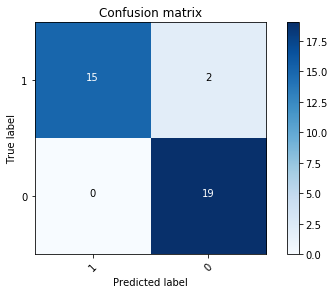

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [64]:
confusion_matrix = confusion_matrix(Y_test, y_predict)
confusion_matrix

array([[19,  0],
       [ 2, 15]], dtype=int64)

In [65]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9047619047619048
Specificity :  1.0


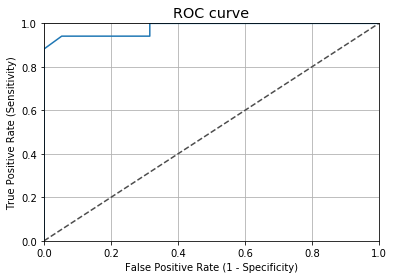

In [66]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [67]:
auc(fpr, tpr)

0.9798761609907121

## AdaBoost

In [68]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_train_scaled, Y_train, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set        
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_train_scaled, Y_train)

PredictedOutput = SelectedBoostModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter of M is: ", best_M)
print("best parameter of LR is: ", best_lr)
print("Test accuracy with the best parameter is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

Best accuracy on validation set is: 0.9435019841269842
Best parameter of M is:  2
best parameter of LR is:  0.0001
Test accuracy with the best parameter is 0.9444444444444444
Test recall with the best parameters is: 0.9411764705882353
Test AUC with the best parameters is: 0.9705882352941176


#### Confusion Matrix

In [69]:
boostModel.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=14, random_state=0)

In [70]:
y_predict = boostModel.predict(X_test)
y_pred_quant = boostModel.predict_proba(X_test)[:, 1]
y_pred_bin = boostModel.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, y_predict, labels=[1,0]))

[[16  1]
 [ 0 19]]


Confusion matrix, without normalization
[[16  1]
 [ 0 19]]


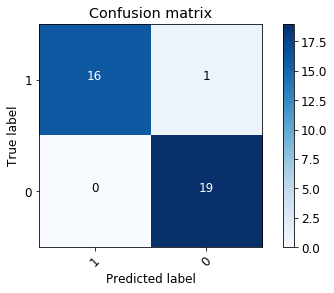

In [72]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [73]:
confusion_matrix = confusion_matrix(Y_test, y_predict)
confusion_matrix

array([[19,  0],
       [ 1, 16]], dtype=int64)

In [74]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.95
Specificity :  1.0


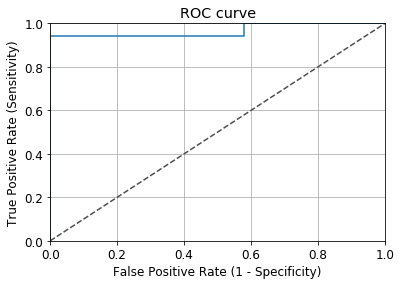

In [75]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [76]:
auc(fpr, tpr)

0.9659442724458205